# Importing the libraries¶                                                                       

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data into the pandas environment and identify some basic details of the dataset.


In [2]:
data=pd.read_csv('employee.csv')
data.head(5)

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [3]:
data.shape

(9, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


# 2. Reset the index as "name" as the index.


In [3]:
data1=data.set_index('name')
data1

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 3. Select rows for specific names Jack Morgan and Josh wills.


In [10]:
data1.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”.


In [13]:
data1.loc[(data1['department'] =='Sales' ) | (data1['department'] =='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.


In [14]:
data1[data1['performance_score'] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [15]:
data1[(data1['performance_score'] < 700) & (data1['performance_score']>500)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.


In [16]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

So it is observed that there are missing values in age,income,gender coloumns.

In [5]:
data['age'].median()

45.0

In [6]:
data['age'].fillna(data['age'].median(), inplace=True)

In [7]:
data['income'].median()

52000.0

In [8]:
data['income'].fillna(data['income'].median(), inplace=True)

In [9]:
data['gender'].mode()

0    F
dtype: object

In [10]:
data['gender'].fillna(data['gender'].mode()[0], inplace = True)

In [11]:
data.isna().sum()

name                 0
age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

So here we have used median imputation method for replacing the missing values in numerical data and mode imputation for categorical data like gender.Hence the missing values are removed.

# 8. Check the outliers and handle outliers in performance score using Percentiles.

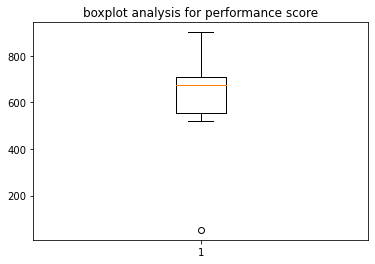

In [12]:
plt.boxplot(data['performance_score'])
plt.title('boxplot analysis for performance score')
plt.show()

It is observed that there is one outlier in the performance column.

In [14]:
Q1=np.percentile(data['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(data['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(data['performance_score'],75,interpolation='midpoint')
print('Q1 = ',Q1,'Q2=',Q2,'Q3=',Q3)

Q1 =  556.0 Q2= 674.0 Q3= 711.0


In [15]:
IQR=Q3-Q1
print('IQR = ',IQR)

IQR =  155.0


In [16]:
low_lim=Q1-(1.5*IQR)
up_lim=Q3+(1.5*IQR)
print('Upper limit = ',up_lim)
print('Lower limit = ',low_lim)

Upper limit =  943.5
Lower limit =  323.5


In [19]:
outlier=[]
for i in data['performance_score']:
    if (i>up_lim or i<low_lim):
        outlier.append(i)
outlier

[53]

In [25]:
ind1=data1['performance_score']<low_lim
data1.loc[ind1].index

Index(['James Authur'], dtype='object', name='name')

In [26]:
data1.drop(['James Authur'],inplace=True)

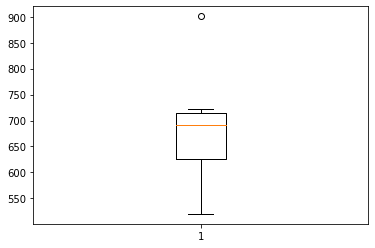

In [28]:
plt.boxplot(data1['performance_score'])
plt.show()

# 9. Check the gender column and do Dummy encoding.

In [29]:
data1=pd.get_dummies(data,columns=['gender'])
data1

,name,age,income,department,grade,performance_score,gender_F,gender_M
0,Allen Smith,45.0,52000.0,Operations,G3,723,1,0
1,S Kumar,45.0,16000.0,Finance,G0,520,1,0
2,Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
3,Ying Chin,45.0,65000.0,Sales,G3,556,1,0
4,Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
5,Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
6,James Authur,54.0,52000.0,Operations,G3,53,1,0
7,Josh Wills,54.0,52000.0,Finance,G3,901,1,0
8,Leo Duck,23.0,98000.0,Sales,G4,709,0,1


# 10.Do the standard scaling on the feature performance score.

In [4]:
data['performance_score']

0    723
1    520
2    674
3    556
4    711
5    649
6     53
7    901
8    709
Name: performance_score, dtype: int64

In [5]:
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
data[['performance_score']]=standardisation.fit_transform(data[['performance_score']])
data[['performance_score']]=pd.DataFrame(data[['performance_score']])
data[['performance_score']]

,performance_score
0,0.505565
1,-0.408053
2,0.285037
3,-0.246032
4,0.451558
5,0.172522
6,-2.509823
7,1.306668
8,0.442557


# Submitted by Group 15
